In [2]:
from google.colab import drive
drive.mount('/content/drive')
import os

import json
import os

# Specify the path to your Kaggle API credentials JSON file
kaggle_json_path = '/content/drive/MyDrive/Multicancer/kaggle.json'

# Update with the actual path

# Check if the JSON file exists
if os.path.exists(kaggle_json_path):
    with open(kaggle_json_path, 'r') as json_file:
        kaggle_credentials = json.load(json_file)

    # Extract username and key from the JSON file
    kaggle_username = kaggle_credentials['username']
    kaggle_key = kaggle_credentials['key']

    # Set Kaggle API credentials as environment variables
    os.environ['KAGGLE_USERNAME'] = kaggle_username
    os.environ['KAGGLE_KEY'] = kaggle_key
else:
    print("Kaggle API credentials JSON file not found.")


import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d obulisainaren/multi-cancer -p '/content/'

import zipfile

with zipfile.ZipFile('/content/multi-cancer.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
... resuming from 5882511360 bytes (3369389493 bytes left) ...
100% 8.61G/8.62G [00:40<00:00, 146MB/s]
100% 8.62G/8.62G [00:41<00:00, 82.2MB/s]


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [25]:
allbening=[]
all_early=[]
all_pre=[]
all_pro=[]
for i in os.listdir('/content/Multi Cancer/ALL'):
    All=os.path.join('/content/Multi Cancer/ALL',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='all_pro':
            #print(image_path)
            all_pro.append({'image_path':image_path,'sub_class':'all_pro','main_class':'All'})
        elif i=='all_early':
            #print(image_path)
            all_early.append({'image_path':image_path,'sub_class':'all_early','main_class':'All'})
        elif i=='all_pre':
            #print(image_path)
            all_pre.append({'image_path':image_path,'sub_class':'all_pre','main_class':'All'})
        elif i=='all_benign':
            #print(image_path)
            allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'All'})


df1=pd.DataFrame(allbening)
df2=pd.DataFrame(all_early)
df3=pd.DataFrame(all_pre)
df4=pd.DataFrame(all_pro)
all_bening_df=pd.concat([df1, df2,df3,df4])



BrainGlioma=[]
BrainMenin=[]
BrainTumor=[]
for i in os.listdir('/content/Multi Cancer/Brain Cancer'):
    All=os.path.join('/content/Multi Cancer/Brain Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='brain_glioma':
            #print(image_path)
            BrainGlioma.append({'image_path':image_path,'sub_class':'brain_glioma','main_class':'BrainCancer'})
        elif i=='brain_menin':
            #print(image_path)
            BrainMenin.append({'image_path':image_path,'sub_class':'brain_menin','main_class':'BrainCancer'})
        elif i=='brain_tumor':
            #print(image_path)
            BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df21=pd.DataFrame(BrainGlioma)
df22=pd.DataFrame(BrainMenin)
df23=pd.DataFrame(BrainTumor)
BrainCancerDf=pd.concat([df21, df22,df23])



BreastBenign=[]
BreastMalignant=[]

for i in os.listdir('/content/Multi Cancer/Breast Cancer'):
    All=os.path.join('/content/Multi Cancer/Breast Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='breast_benign':
            #print(image_path)
            BreastBenign.append({'image_path':image_path,'sub_class':'BreastBenign','main_class':'BreastCancer'})
        elif i=='breast_malignant':
            #print(image_path)
            BreastMalignant.append({'image_path':image_path,'sub_class':'BreastMalignant','main_class':'BreastCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df31=pd.DataFrame(BreastBenign)
df32=pd.DataFrame(BreastMalignant)

BreastCancerDf=pd.concat([df31, df32])


cervix_dyk=[]
cervix_koc=[]
cervix_mep=[]
cervix_pab=[]
cervix_sfi=[]

for i in os.listdir('/content/Multi Cancer/Cervical Cancer'):
    All=os.path.join('/content/Multi Cancer/Cervical Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='cervix_dyk':
            #print(image_path)
            cervix_dyk.append({'image_path':image_path,'sub_class':'cervix_dyk','main_class':'CervicalCancer'})
        elif i=='cervix_koc':
            #print(image_path)
            cervix_koc.append({'image_path':image_path,'sub_class':'cervix_koc','main_class':'CervicalCancer'})
        elif i=='cervix_mep':
            #print(image_path)
            cervix_mep.append({'image_path':image_path,'sub_class':'cervix_mep','main_class':'CervicalCancer'})
        elif i=='cervix_pab':
            #print(image_path)
            cervix_pab.append({'image_path':image_path,'sub_class':'cervix_pab','main_class':'CervicalCancer'})

        elif i=='cervix_sfi':
            #print(image_path)
            cervix_sfi.append({'image_path':image_path,'sub_class':'cervix_sfi','main_class':'CervicalCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df41=pd.DataFrame(cervix_dyk)
df42=pd.DataFrame(cervix_koc)
df43=pd.DataFrame(cervix_mep)
df44=pd.DataFrame(cervix_pab)
df45=pd.DataFrame(cervix_sfi)
CervicalCancer=pd.concat([df41, df42,df43,df44,df45])


kidney_normal=[]
kidney_tumor=[]

for i in os.listdir('/content/Multi Cancer/Kidney Cancer'):
    All=os.path.join('/content/Multi Cancer/Kidney Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='kidney_normal':
            #print(image_path)
            kidney_normal.append({'image_path':image_path,'sub_class':'kidney_normal','main_class':'KidneyCancer'})
        elif i=='kidney_tumor':
            #print(image_path)
            kidney_tumor.append({'image_path':image_path,'sub_class':'kidney_tumor','main_class':'KidneyCancer'})
#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df51=pd.DataFrame(kidney_normal)
df52=pd.DataFrame(kidney_tumor)

KidneyCancer=pd.concat([df51, df52])


colon_aca=[]
colon_bnt=[]
lung_aca=[]
lung_bnt=[]
lung_scc=[]

for i in os.listdir('/content/Multi Cancer/Lung and Colon Cancer'):
    All=os.path.join('/content/Multi Cancer/Lung and Colon Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='colon_aca':
            #print(image_path)
            colon_aca.append({'image_path':image_path,'sub_class':'colon_aca','main_class':'ColonCancer'})
        elif i=='colon_bnt':
            #print(image_path)
            colon_bnt.append({'image_path':image_path,'sub_class':'colon_bnt','main_class':'ColonCancer'})
        elif i=='lung_aca':
            #print(image_path)
            lung_aca.append({'image_path':image_path,'sub_class':'lung_aca','main_class':'ColonCancer'})
        elif i=='lung_bnt':
            #print(image_path)
            lung_bnt.append({'image_path':image_path,'sub_class':'lung_bnt','main_class':'ColonCancer'})

        elif i=='lung_scc':
            #print(image_path)
            lung_scc.append({'image_path':image_path,'sub_class':'lung_scc','main_class':'ColonCancer'})



#         elif i=='brain_tumor':
#             #print(image_path)
#             BrainTumor.append({'image_path':image_path,'sub_class':'brain_tumor','main_class':'BrainCancer'})
# #         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})

df61=pd.DataFrame(colon_aca)
df62=pd.DataFrame(colon_bnt)
df63=pd.DataFrame(lung_aca)
df64=pd.DataFrame(lung_bnt)
df65=pd.DataFrame(lung_scc)
ColonCancer=pd.concat([df61, df62,df63,df64,df65])


lymph_cll=[]
lymph_fl=[]
lymp_mcl=[]
for i in os.listdir('/content/Multi Cancer/Lymphoma'):
    All=os.path.join('/content/Multi Cancer/Lymphoma',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='lymph_cll':
            #print(image_path)
            lymph_cll.append({'image_path':image_path,'sub_class':'lymph_cll','main_class':'Lymphoma'})
        elif i=='lymph_fl':
            #print(image_path)
            lymph_fl.append({'image_path':image_path,'sub_class':'lymph_fl','main_class':'Lymphoma'})
        elif i=='lymp_mcl':
            #print(image_path)
            lymp_mcl.append({'image_path':image_path,'sub_class':'lymp_mcl','main_class':'Lymphoma'})
#         elif i=='all_benign':
#             #print(image_path)
#             allbening.append({'image_path':image_path,'sub_class':'all_benign','main_class':'BrainCancer'})


df71=pd.DataFrame(lymph_cll)
df72=pd.DataFrame(lymph_fl)
df73=pd.DataFrame(lymp_mcl)
Lymphoma=pd.concat([df71, df72,df73])


oral_normal=[]
oral_scc=[]

for i in os.listdir('/content/Multi Cancer/Oral Cancer'):
    All=os.path.join('/content/Multi Cancer/Oral Cancer',i)
    for j in os.listdir(All):
        image_path=os.path.join(All,j)
        if i=='oral_normal':
            #print(image_path)
            oral_normal.append({'image_path':image_path,'sub_class':'oral_normal','main_class':'OralCancer'})
        elif i=='oral_scc':
            #print(image_path)
            oral_scc.append({'image_path':image_path,'sub_class':'oral_scc','main_class':'OralCancer'})

df81=pd.DataFrame(oral_normal)
df82=pd.DataFrame(oral_normal)

OralCancer=pd.concat([df81, df82])

combined=pd.concat([all_bening_df,BrainCancerDf,BreastCancerDf,CervicalCancer,KidneyCancer,ColonCancer,Lymphoma,OralCancer],ignore_index=True)





combined['int_main_class'] = pd.factorize(combined['main_class'])[0]
combined['int_sub_class'] = pd.factorize(combined['sub_class'])[0]


np.random.seed(42)
combined=combined.sample(frac=0.5)

In [26]:
np.random.seed(42)
train=combined.iloc[0:int(len(combined)*0.8),:]
others=combined.iloc[int(len(combined)*0.8):,:]
validation=others.iloc[0:int(len(others)*0.5),:]
test=others.iloc[int(len(others)*0.5):,:]

In [27]:
test=test.sample(frac=0.2)

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, batch_size=256, image_size=(100, 100)):
        self.data = data
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_main_class = len(data['main_class'].unique())
        self.num_sub_class = len(data['sub_class'].unique())
        self.indexes = np.arange(len(data))
        self.current_index = 0

        # Compute class indices and label names for main class
        self.main_class_indices = {class_name: i for i, class_name in enumerate(data['main_class'].unique())}
        self.main_label_names = {v: k for k, v in self.main_class_indices.items()}

        # Compute class indices and label names for sub class
        self.sub_class_indices = {class_name: i for i, class_name in enumerate(data['sub_class'].unique())}
        self.sub_label_names = {v: k for k, v in self.sub_class_indices.items()}

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.current_index = 0
            raise StopIteration
        else:
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = self.load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.main_class_indices[self.data.iloc[idx]['main_class']]
            y_sub[i] = self.sub_class_indices[self.data.iloc[idx]['sub_class']]

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub

    @staticmethod
    def load_and_preprocess_image(image_path, image_size):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = image / 255.0
        return image

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

batch_size = 1024
np.random.seed(42)
train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
validation_Generator = CancerImageDataGenerator(data=validation, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)

In [7]:
import os
os.listdir('/content/drive/MyDrive/Multicancer')

['Tensorflow Multicancer.ipynb',
 'vgg_history.pkl',
 'vgg_best_model.h5',
 'vgg_best_model(3).h5',
 'inception_history.pkl',
 'resnet50_history.pkl',
 'kaggle_working.h5',
 'inception_best_model.h5',
 'resnet50_best_model.h5',
 'xception_model_history.pkl',
 'xception_model_best_model(1).h5',
 'mobilenet_history.pkl',
 'Version2',
 'kaggle.json',
 'Model',
 'only_vgg_history .pkl',
 'only_vgg_best_model.h5',
 'only_mobilenet_history.pkl',
 'only_mobilenet_best_model.h5',
 'Test_multicancer.ipynb',
 'Untitled0.ipynb']

In [8]:
import tensorflow as tf

# Load the saved model from the .h5 file
vggmodel = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')
resnet= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/resnet50_best_model.h5')
xception= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/xception_model_best_model(1).h5')
inception= tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/inception_best_model.h5')

15/15 [==============================] - 7s 355ms/step


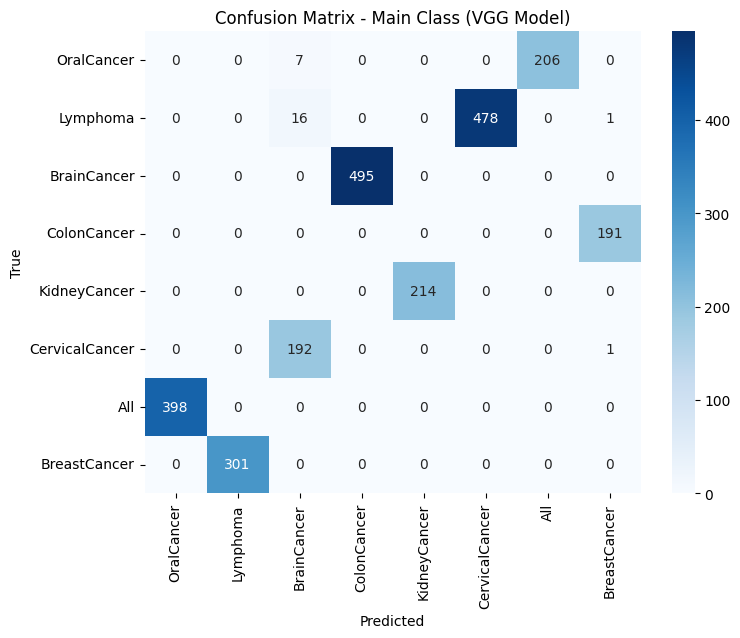

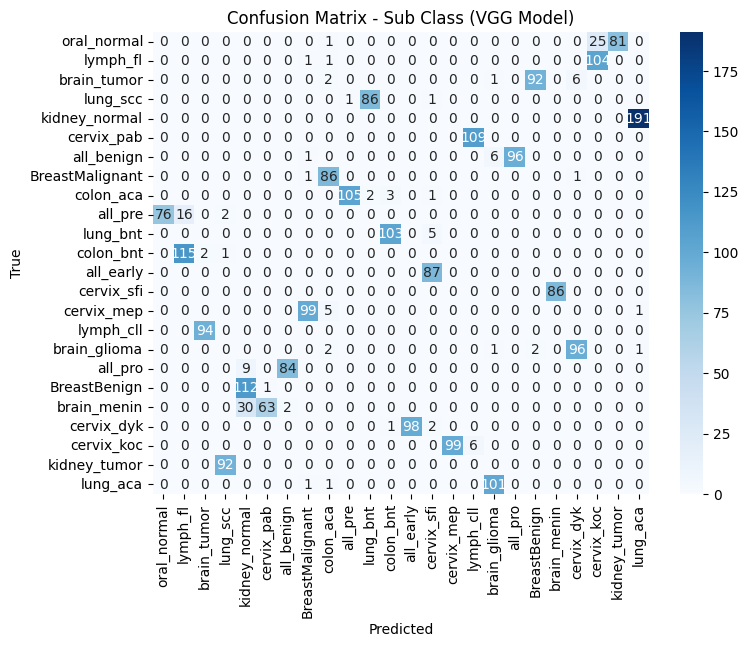

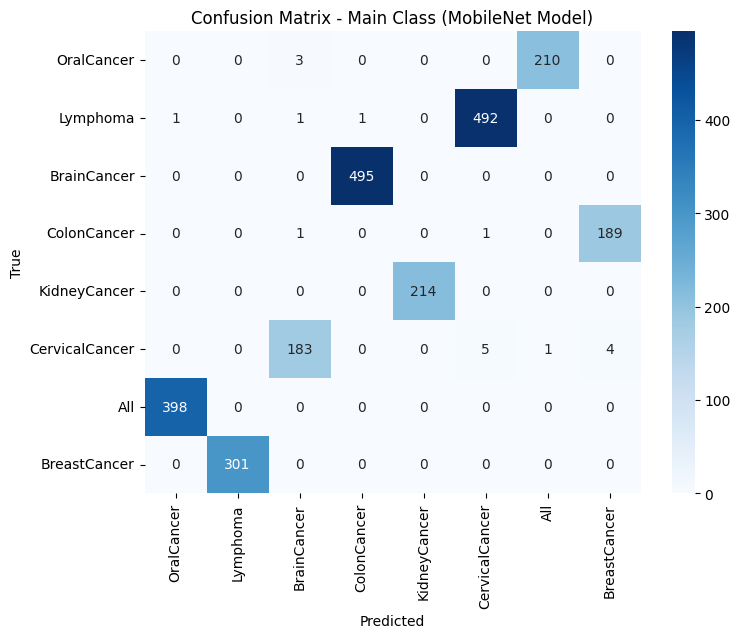

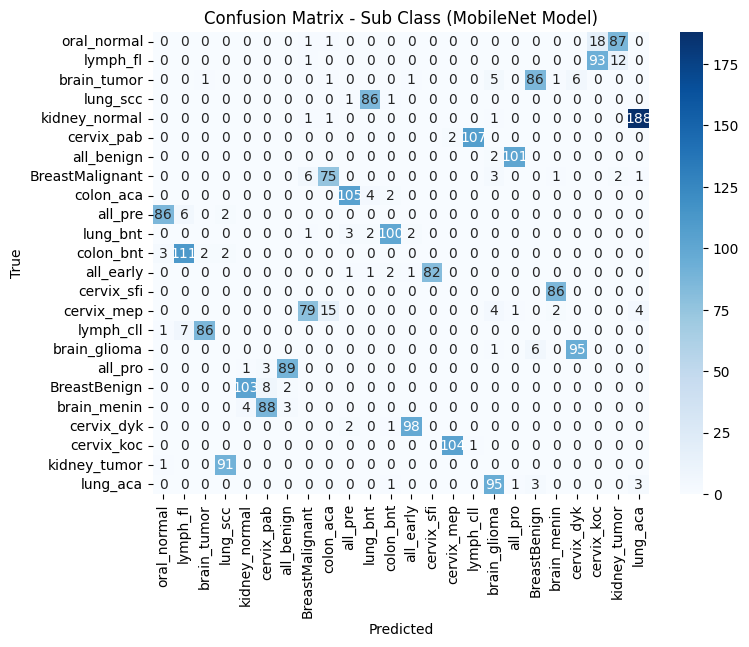

In [13]:

# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Function to predict and get true labels
# def predict_and_get_labels(model, data_generator):
#     # y_true_main = []
#     y_pred_main = []
#     y_true_sub = []
#     y_pred_sub = []

#     for i in range(len(data_generator)):
#         batch_X, [batch_y_main, batch_y_sub] = data_generator[i]
#         y_true_main.extend(tf.argmax(batch_y_main, axis=1).numpy())
#         y_true_sub.extend(tf.argmax(batch_y_sub, axis=1).numpy())

#         batch_pred = model.predict(batch_X)
#         y_pred_main.extend(tf.argmax(batch_pred[0], axis=1).numpy())
#         y_pred_sub.extend(tf.argmax(batch_pred[1], axis=1).numpy())

#     return np.array(y_true_main), np.array(y_pred_main), np.array(y_true_sub), np.array(y_pred_sub)

# # Predictions for VGG model
# y_true_main_vgg, y_pred_main_vgg, y_true_sub_vgg, y_pred_sub_vgg = predict_and_get_labels(vggmodel, test_Generator)

# # Predictions for MobileNet model
# y_true_main_mobilenet, y_pred_main_mobilenet, y_true_sub_mobilenet, y_pred_sub_mobilenet = predict_and_get_labels(inception, test_Generator)

# # Confusion matrix for VGG model - Main Class
# cm_main_vgg = confusion_matrix(y_true_main_vgg, y_pred_main_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for VGG model - Sub Class
# cm_sub_vgg = confusion_matrix(y_true_sub_vgg, y_pred_sub_vgg)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_vgg, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (VGG Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Main Class
# cm_main_mobilenet = confusion_matrix(y_true_main_mobilenet, y_pred_main_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_main_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.main_label_names.values(), yticklabels=train_Generator.main_label_names.values())
# plt.title('Confusion Matrix - Main Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Confusion matrix for MobileNet model - Sub Class
# cm_sub_mobilenet = confusion_matrix(y_true_sub_mobilenet, y_pred_sub_mobilenet)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_sub_mobilenet, annot=True, fmt="d", cmap="Blues", xticklabels=train_Generator.sub_label_names.values(), yticklabels=train_Generator.sub_label_names.values())
# plt.title('Confusion Matrix - Sub Class (MobileNet Model)')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


15/15 [==============================] - 9s 422ms/step


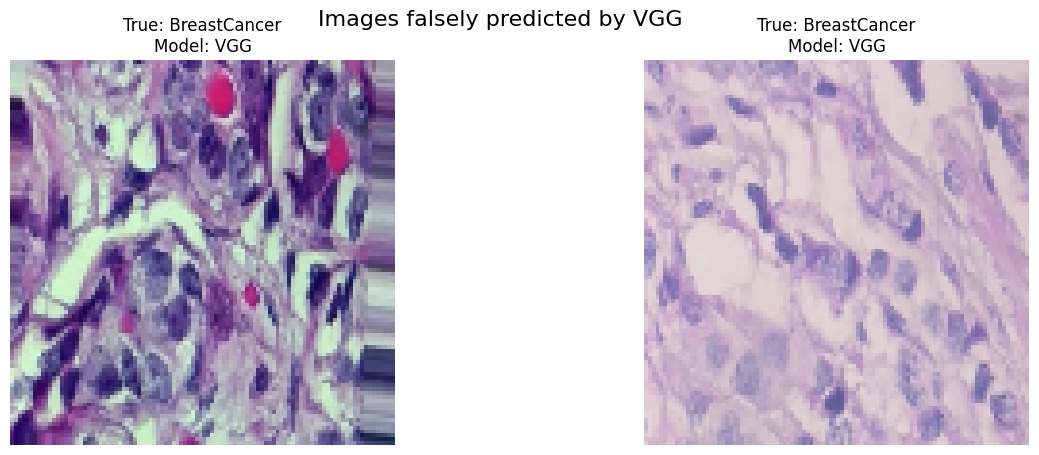

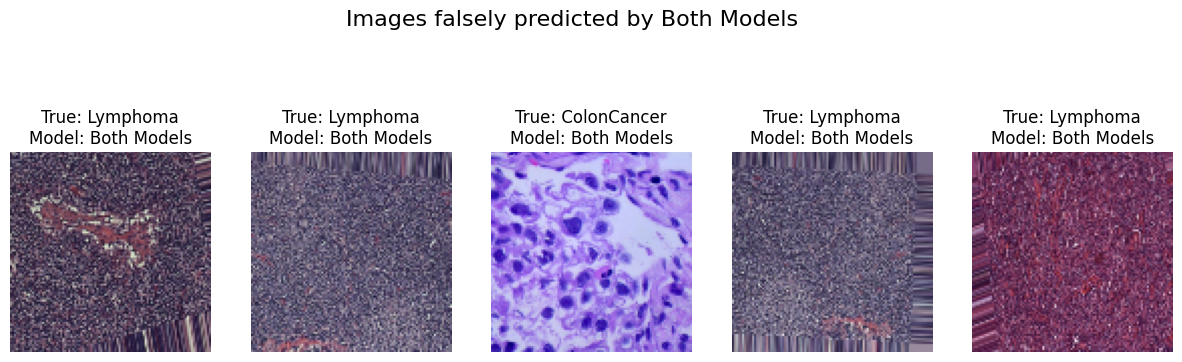

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data, vgg_model, resnet_model, batch_size=256, image_size=(100, 100)):
        self.data = data
        self.image_size = image_size
        self.batch_size = batch_size
        self.num_main_class = len(data['main_class'].unique())
        self.num_sub_class = len(data['sub_class'].unique())
        self.indexes = np.arange(len(data))
        self.current_index = 0
        self.vgg_model = vgg_model
        self.resnet_model = resnet_model

        # Compute class indices and label names for main class
        self.main_class_indices = {class_name: i for i, class_name in enumerate(data['main_class'].unique())}
        self.main_label_names = {v: k for k, v in self.main_class_indices.items()}

        # Compute class indices and label names for sub class
        self.sub_class_indices = {class_name: i for i, class_name in enumerate(data['sub_class'].unique())}
        self.sub_label_names = {v: k for k, v in self.sub_class_indices.items()}

    def __len__(self):
        return int(np.ceil(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __iter__(self):
        return self

    def __next__(self):
        if self.current_index >= len(self):
            self.current_index = 0
            raise StopIteration
        else:
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = self.load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.main_class_indices[self.data.iloc[idx]['main_class']]
            y_sub[i] = self.sub_class_indices[self.data.iloc[idx]['sub_class']]

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub

    def predict_vgg(self, X):
        return self.vgg_model.predict(X)

    def predict_resnet(self, X):
        return self.resnet_model.predict(X)

    @staticmethod
    def load_and_preprocess_image(image_path, image_size):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, image_size)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = image / 255.0
        return image


# Assuming you have vgg_model and resnet_model already loaded
batch_size = 1024
np.random.seed(42)
test_Generator = CancerImageDataGenerator(data=test, vgg_model=vggmodel, resnet_model=resnet, batch_size=batch_size)

# Initialize lists to store results
false_by_vgg_true_by_resnet = []
false_by_resnet_true_by_vgg = []
both_false = []

# Iterate over the test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]

    # Predictions by VGG model
    predictions_vgg = test_Generator.predict_vgg(X)
    predicted_labels_vgg = np.argmax(predictions_vgg[0], axis=1)

    # Predictions by ResNet model
    predictions_resnet = test_Generator.predict_resnet(X)
    predicted_labels_resnet = np.argmax(predictions_resnet[0], axis=1)

    # Compare predictions
    for j in range(len(X)):
        true_label = np.argmax(y_main[j])
        if predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] == true_label:
            false_by_vgg_true_by_resnet.append((X[j], true_label))
        elif predicted_labels_resnet[j] != true_label and predicted_labels_vgg[j] == true_label:
            false_by_resnet_true_by_vgg.append((X[j], true_label))
        elif predicted_labels_vgg[j] != true_label and predicted_labels_resnet[j] != true_label:
            both_false.append((X[j], true_label))

# Function to plot images
def plot_images(images, true_labels, model_name, label_names):
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {label_names[int(true_labels[i])]}\nModel: {model_name}")
        plt.axis('off')
    plt.suptitle(f"Images falsely predicted by {model_name}", fontsize=16)
    plt.show()

# Plot falsely predicted images by VGG but correctly predicted by ResNet
if false_by_vgg_true_by_resnet:
    images_vgg_to_resnet, true_labels_vgg_to_resnet = zip(*false_by_vgg_true_by_resnet)
    plot_images(images_vgg_to_resnet[:5], true_labels_vgg_to_resnet[:5], "VGG", test_Generator.main_label_names)

# Plot falsely predicted images by ResNet but correctly predicted by VGG
if false_by_resnet_true_by_vgg:
    images_resnet_to_vgg, true_labels_resnet_to_vgg = zip(*false_by_resnet_true_by_vgg)
    plot_images(images_resnet_to_vgg[:5], true_labels_resnet_to_vgg[:5], "ResNet", test_Generator.main_label_names)

# Plot images where both models predict false
if both_false:
    images_both_false, true_labels_both_false = zip(*both_false)
    plot_images(images_both_false[:5], true_labels_both_false[:5], "Both Models", test_Generator.main_label_names)


In [24]:
resnet.evaluate(test_Generator)

3/3 [==============================] - 47s 11s/step - loss: 59.2064 - dense_2_loss: 33.8807 - dense_3_loss: 25.3257 - dense_2_accuracy: 0.0864 - dense_3_accuracy: 0.0036


[59.20640182495117,
 33.880733489990234,
 25.325666427612305,
 0.08640000224113464,
 0.003599999938160181]

In [29]:
np.random.seed(42)


image_size=75100
import tensorflow as tf
batch_size = 256
class CancerImageDataGenerator(tf.keras.utils.Sequence):
    def __init__(self,data,batch_size=batch_size,image_size=(image_size,image_size)):
        self.data=data
        self.image_size=image_size
        self.batch_size=batch_size
        self.num_main_class=len(self.data.main_class.unique())
        self.num_sub_class=len(self.data.sub_class.unique())
        self.indexes=np.arange(len(self.data))
        self.current_index = 0
    def __len__(self):
        return int(np.ceil(len(self.data)/self.batch_size))

    def __getitem__(self, index):
        start_idx = index * self.batch_size
        end_idx = (index + 1) * self.batch_size

        batch_indexes = self.indexes[start_idx:end_idx]
        X, y_main, y_sub = self.__data_generation(batch_indexes)

        return X, [y_main, y_sub]

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)
    def __iter__(self):
        return self
    def __next__(self):
        if self.current_index >= len(self):
            # If we have iterated over all batches, reset the index and raise StopIteration
            self.current_index = 0
            raise StopIteration
        else:
            # Get the next batch and increment the current index
            batch_X, batch_Y = self.__getitem__(self.current_index)
            self.current_index += 1
            return batch_X, batch_Y

    def __data_generation(self, batch_indexes):
        X = np.empty((len(batch_indexes), *self.image_size, 3))
        y_main = np.empty((len(batch_indexes)), dtype=int)
        y_sub = np.empty((len(batch_indexes)), dtype=int)

        for i, idx in enumerate(batch_indexes):
            image_path = self.data.iloc[idx]['image_path']
            img = load_and_preprocess_image(image_path, self.image_size)
            X[i,] = img
            y_main[i] = self.data.iloc[idx]['int_main_class']
            y_sub[i] = self.data.iloc[idx]['int_sub_class']

        y_main = to_categorical(y_main, num_classes=self.num_main_class)
        y_sub = to_categorical(y_sub, num_classes=self.num_sub_class)

        return X, y_main, y_sub



import cv2
import numpy as np

def load_and_preprocess_image(image_path, image_size):
    # Load and preprocess the image using OpenCV
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    image = cv2.resize(image, (image_size[1], image_size[0]))  # Resize the image
    image = image.astype(np.float32)  # Convert image to float32
    image /= 255.0  # Normalize to range [0, 1]

    return image



import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


#train_Generator = CancerImageDataGenerator(data=train, batch_size=batch_size)
#validation_Generator = CancerImageDataGenerator(data=val_df, batch_size=batch_size)
test_Generator = CancerImageDataGenerator(data=test, batch_size=batch_size)

In [1]:
combined

NameError: name 'combined' is not defined

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your pre-trained model (make sure to adjust the model loading code)
model = tf.keras.models.load_model('/content/drive/MyDrive/Multicancer/vgg_best_model(3).h5')

# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate over your test Generator to generate predictions
for i in range(len(test_Generator)):
    X, [y_main, y_sub] = test_Generator[i]
    # Replace [y_main, y_sub] with the appropriate output from your model.
    # If your model returns a list of predictions, modify this part accordingly.
    predictions = model.predict(X)
    # Convert predicted probabilities into class labels
    predicted_main = np.argmax(predictions[0], axis=1)
    predicted_sub = np.argmax(predictions[1], axis=1)
    # Append true and predicted labels to the lists
    true_labels.extend(np.argmax(y_main, axis=1))
    predicted_labels.extend(predicted_main)

# Create the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()